# **Actividad Grupal 1 Módulo 8**

## Alumnos:
* Daiana Clavijo
* Felipe Franz
* Heiner Romero Leiva

# **Descripción de la tarea**

El Equipo de Ciencia de Datos de IL3 ha sido invitado a una reunión de urgencia sobre los últimos acontecimientos.

Los crímenes han crecido tanto que los alcaldes de los estados más influyentes de Estados Unidos han pedido ayuda a los expertos de Ciencia de Datos de IL3.

Los alcaldes quieren saber:

* Los motivos de los crímenes y si tienen algo que ver con la edad, la raza y el área.
* Sobre todo, piden a los expertos padawan que predigan, a base de un modelo de regresión no tan costoso, cómo poder anticiparse al crimen.

Se pide:

1. Limpiar y visualizar los datos.
2. Pensar en usar la matriz de correlación.
3. Regresión lineal (tomando todas las características del modelo).
4. Regresión lineal (tomando 68 características basadas en la matriz de correlación).
5. Regresión lineal (tomando 23 características basadas en el valor p).
6. Regresión polinomial (tomando 23 características basadas en el valor p).
7. Regresión de Ridge (tomando 23 características basadas en el valor p). Usar Ridge regression con 5-fold cross-validation y gridsearch 
8. Regresión lineal ponderada (tomando 23 características basadas en el valor p).
9. Regresión de XG boost (Tomando 23 características basadas en el valor p).
10. Regresión de Gradient Boosting (tomando 23 características basadas en el valor p).
11. Regresión Light GBM (tomando 23 características basadas en el valor p).


# 1) Limpiar y visualizar los datos.

Primero que todo se cargan algunas de las bibliotecas que se utilizarán en la presente tarea, y también se establecen algunos parámetros de visualización.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.simplefilter(action="ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

Posteriormente se procede a cargar el archivo de datos desde GitHub.



In [3]:
# Leemos el csv con pandas y lo pasamos a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/levraines/Portfolio/master/Master_Artificial%20Intelligence/Data/crimedata.csv",encoding='latin-1',na_values=["?"])

# Visualizando las dimensiones
print("Dimensión del dataframe:\n",df.shape,"\n")

# Viendo las primeras 5 observaciones
df.head()

Dimensión del dataframe:
 (2215, 147) 



Êcommunityname state  countyCode  communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ        39.0         5320.0     1       11980   
1           Marpletownship    PA        45.0        47616.0     1       23123   
2               Tigardcity    OR         NaN            NaN     1       29344   
3         Gloversvillecity    NY        35.0        29443.0     1       16656   
4              Bemidjicity    MN         7.0         5068.0     1       11245   

   householdsize  racepctblack  racePctWhite  racePctAsian  racePctHisp  \
0           3.10          1.37         91.78          6.50         1.88   
1           2.82          0.80         95.57          3.44         0.85   
2           2.43          0.74         94.33          3.43         2.35   
3           2.40          1.70         97.35          0.50         0.70   
4           2.76          0.53         89.16          1.17         0.52   

   agePct12t21  agePct12t29  agePct16t24  agePct65up  numbUrban  pctUrban  \
0        12.47        21.44        10.93       11.33      11980     100.0   
1        11.01        21.30        10.48       17.18      23123     100.0   
2        11.36        25.88        11.01       10.28      29344     100.0   
3        12.55        25.20        12.19       17.57          0       0.0   
4        24.46        40.53        28.69       12.65          0       0.0   

   medIncome  pctWWage  pctWFarmSelf  pctWInvInc  pctWSocSec  pctWPubAsst  \
0      75122     89.24          1.55       70.20       23.62         1.03   
1      47917     78.99          1.11       64.11       35.50         2.75   
2      35669     82.00          1.15       55.73       22.25         2.94   
3      20580     68.15          0.24       38.95       39.48        11.71   
4      17390     69.33          0.55       42.82       32.16        11.21   

   pctWRetire  medFamInc  perCapInc  whitePerCap  blackPerCap  indianPerCap  \
0       18.39      79584      29711        30233        13600          5725   
1       22.85      55323      20148        20191        18137             0   
2       14.56      42112      16946        17103        16644         21606   
3       18.33      26501      10810        10909         9984          4941   
4       14.43      24018       8483         9009          887          4425   

   AsianPerCap  OtherPerCap  HispPerCap  NumUnderPov  PctPopUnderPov  \
0        27101       5115.0       22838          227            1.96   
1        20074       5250.0       12222          885            3.98   
2        15528       5954.0        8405         1389            4.75   
3         3541       2451.0        4391         2831           17.23   
4         3352       3000.0        1328         2855           29.99   

   PctLess9thGrade  PctNotHSGrad  PctBSorMore  PctUnemployed  PctEmploy  \
0             5.81          9.90        48.18           2.70      64.55   
1             5.61         13.72        29.89           2.43      61.96   
2             2.80          9.09        30.13           4.01      69.80   
3            11.05         33.68        10.81           9.86      54.74   
4            12.15         23.06        25.28           9.08      52.44   

   PctEmplManu  PctEmplProfServ  PctOccupManu  PctOccupMgmtProf  \
0        14.65            28.82          5.49             50.73   
1        12.26            29.28          6.39             37.64   
2        15.95            21.52          8.79             32.48   
3        31.22            27.43         26.76             22.71   
4         6.89            36.54         10.94             27.80   

   MalePctDivorce  MalePctNevMarr  FemalePctDiv  TotalPctDiv  PersPerFam  \
0            3.67           26.38          5.22         4.47        3.22   
1            4.23           27.99          6.45         5.42        3.11   
2           10.10           25.78         14.76        12.55        2.95   
3           10.98           28.15         14.47        12.91        2.98   
4     

Se observa que el dataframe tiene 2215 observaciones y 147 columnas. 

También se puede observar que hay muchos valores NaN o missing, lo que constituye un problema para realizar modelos, por lo que se va a tener que realizar alguna técnica de imputación con dichos valores o eliminar la variable si estos missing values representan más de un 15%. 

Se analiza cuantos NaN presentan las variables.

In [4]:
# Determinando la cantidad de NaN de cada variable
np.sum(df.isnull())

Êcommunityname              0
state                       0
countyCode               1221
communityCode            1224
fold                        0
population                  0
householdsize               0
racepctblack                0
racePctWhite                0
racePctAsian                0
racePctHisp                 0
agePct12t21                 0
agePct12t29                 0
agePct16t24                 0
agePct65up                  0
numbUrban                   0
pctUrban                    0
medIncome                   0
pctWWage                    0
pctWFarmSelf                0
pctWInvInc                  0
pctWSocSec                  0
pctWPubAsst                 0
pctWRetire                  0
medFamInc                   0
perCapInc                   0
whitePerCap                 0
blackPerCap                 0
indianPerCap                0
AsianPerCap                 0
OtherPerCap                 1
HispPerCap                  0
NumUnderPov                 0
PctPopUnde

Se observa que existen variables con una gran proporción de NaN. Hay muchas variables con 1872 observaciones NaN (un 84,5% del total de observaciones), y también hay 2 con aproximadamente que contienen 1220 NaN (55% de observaciones). 

Al ser un número significativo de observaciones con missing, se decide eliminar estas variables, ya que traerán problemas al elaborar los modelos. 

Hay otras variables que también tienen NaN pero en menor proporción. Se eliminan aquellas variables con más de 15% de NaN y se procede a imputar las restantes con algún método estocástico. 

In [5]:
# Eliminando aquellas variables con más de 15% de NaN
df = df.loc[:, df.isnull().mean() < .15]

De todas maneras siguen quedando algunas variables con NaN, pero tienen menor proporción. Como no tienen una cantidad significativa de NaN, decidimos imputar los valores de estos missings. Para ello usamos el KNNimputer, pero se precisa que todas las variables sean numéricas. Miramos cuáles variables string hay:

In [6]:
# Revisando las variables que son string
df.select_dtypes(include=['object'])

Êcommunityname state
0     BerkeleyHeightstownship    NJ
1              Marpletownship    PA
2                  Tigardcity    OR
3            Gloversvillecity    NY
4                 Bemidjicity    MN
...                       ...   ...
2210               Mercedcity    CA
2211            Pinevillecity    LA
2212              Yucaipacity    CA
2213             Beevillecity    TX
2214       WestSacramentocity    CA

[2215 rows x 2 columns]

Se determina que hay dos variables de tipo string: el nombre de la comunidad, y el Estado. Aquí es importante mencionar que se pueden usar diferentes métodos para convertir las variables de tipo string a numéricas como convertirlas a dummies, sin emnbargo al ser muchos factores que contienen dichas variables creará muchas variables artificiales dicotómicas que no le añaden mucho sentido al modelo, de ahí que se opta a realizar dicha conversión con el `label encoder.` 

In [7]:
# Hay que transformar las variables categorias a numericas
obj_df = df.select_dtypes(include=['object']).copy()
print(obj_df.columns)

Index(['Êcommunityname', 'state'], dtype='object')


In [8]:
# Importando Label Encoder
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()

Se creó una dummy por cada Estado y cada comunidad, menos una de cada una. Ahora todas las variables son numéricas.

Procedemos como último paso de limpieza a imputar por medio de KNN los NaN.

In [9]:
# Creando un for para iterar por todo el subset
for col in obj_df.columns:
    df[col] = lb_encoder.fit_transform(df[col].astype(str))

In [10]:
# Comprobando si las variables fueron convertidas de forma correcta
df.dtypes

Êcommunityname             int64
state                      int64
fold                       int64
population                 int64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                  int64
pctUrban                 float64
medIncome                  int64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                  int64
perCapInc                  int64
whitePerCap                int64
blackPerCap                int64
indianPerCap               int64
AsianPerCap                int64
OtherPerCap              float64
HispPerCap                 int64
NumUnderPo

Como se puede observar se han podido convertir las dos variables de tipo `string` y ahora todas las variables son de tipo `int` o `float`.

In [11]:
# Se procede a imputar los valores faltantes
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_encode = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

Comprbamos ahora que no queden valores NaN en ninguna variable

In [12]:
# Conprobando si hay valores NaN
np.sum(df_encode.isnull().sum()>0)

0

Con la imputación realizada, no queda ninguna variable con valores NaN. Por lo tanto la limpieza ha sido exitosa y se procede a visualizar los datos de nuevo.

In [13]:
# Renombrando dataset 
data = df_encode

In [14]:
# Comprobando el dataset final
data.head()

Êcommunityname  state  fold  population  householdsize  racepctblack  \
0           149.0   28.0   1.0     11980.0           3.10          1.37   
1          1034.0   35.0   1.0     23123.0           2.82          0.80   
2          1780.0   34.0   1.0     29344.0           2.43          0.74   
3           664.0   31.0   1.0     16656.0           2.40          1.70   
4           140.0   22.0   1.0     11245.0           2.76          0.53   

   racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  \
0         91.78          6.50         1.88        12.47        21.44   
1         95.57          3.44         0.85        11.01        21.30   
2         94.33          3.43         2.35        11.36        25.88   
3         97.35          0.50         0.70        12.55        25.20   
4         89.16          1.17         0.52        24.46        40.53   

   agePct16t24  agePct65up  numbUrban  pctUrban  medIncome  pctWWage  \
0        10.93       11.33    11980.0     100.0    75122.0     89.24   
1        10.48       17.18    23123.0     100.0    47917.0     78.99   
2        11.01       10.28    29344.0     100.0    35669.0     82.00   
3        12.19       17.57        0.0       0.0    20580.0     68.15   
4        28.69       12.65        0.0       0.0    17390.0     69.33   

   pctWFarmSelf  pctWInvInc  pctWSocSec  pctWPubAsst  pctWRetire  medFamInc  \
0          1.55       70.20       23.62         1.03       18.39    79584.0   
1          1.11       64.11       35.50         2.75       22.85    55323.0   
2          1.15       55.73       22.25         2.94       14.56    42112.0   
3          0.24       38.95       39.48        11.71       18.33    26501.0   
4          0.55       42.82       32.16        11.21       14.43    24018.0   

   perCapInc  whitePerCap  blackPerCap  indianPerCap  AsianPerCap  \
0    29711.0      30233.0      13600.0        5725.0      27101.0   
1    20148.0      20191.0      18137.0           0.0      20074.0   
2    16946.0      17103.0      16644.0       21606.0      15528.0   
3    10810.0      10909.0       9984.0        4941.0       3541.0   
4     8483.0       9009.0        887.0        4425.0       3352.0   

   OtherPerCap  HispPerCap  NumUnderPov  PctPopUnderPov  PctLess9thGrade  \
0       5115.0     22838.0        227.0            1.96             5.81   
1       5250.0     12222.0        885.0            3.98             5.61   
2       5954.0      8405.0       1389.0            4.75             2.80   
3       2451.0      4391.0       2831.0           17.23            11.05   
4       3000.0      1328.0       2855.0           29.99            12.15   

   PctNotHSGrad  PctBSorMore  PctUnemployed  PctEmploy  PctEmplManu  \
0          9.90        48.18           2.70      64.55        14.65   
1         13.72        29.89           2.43      61.96        12.26   
2          9.09        30.13           4.01      69.80        15.95   
3         33.68        10.81           9.86      54.74        31.22   
4         23.06        25.28           9.08      52.44         6.89   

   PctEmplProfServ  PctOccupManu  PctOccupMgmtProf  MalePctDivorce  \
0            28.82          5.49             50.73            3.67   
1            29.28          6.39             37.64            4.23   
2            21.52          8.79             32.48           10.10   
3            27.43         26.76             22.71           10.98   
4            36.54         10.94             27.80            7.51   

   MalePctNevMarr  FemalePctDiv  TotalPctDiv  PersPerFam  PctFam2Par  \
0           26.38          5.22         4.47        3.22       91.43   
1           27.99          6.45         5.42        3.11       86.91   
2           25.78         14.76        12.55        2.95       78.54   
3           28.15         14.47        12.91        2.98       64.02   
4           50.66         11.64         9.73        2.98       58.59   

   PctKids2Par  PctYoungKids2Par  PctTeen2Par  PctWorkMomY

# 2) Pensar en usar la matriz de correlación.

Se realiza la matriz de correlación para ver su impacto con la variable respuesta, que en este caso se toma `ViolentCrimesPerPop` para poder realizar la gráfica.

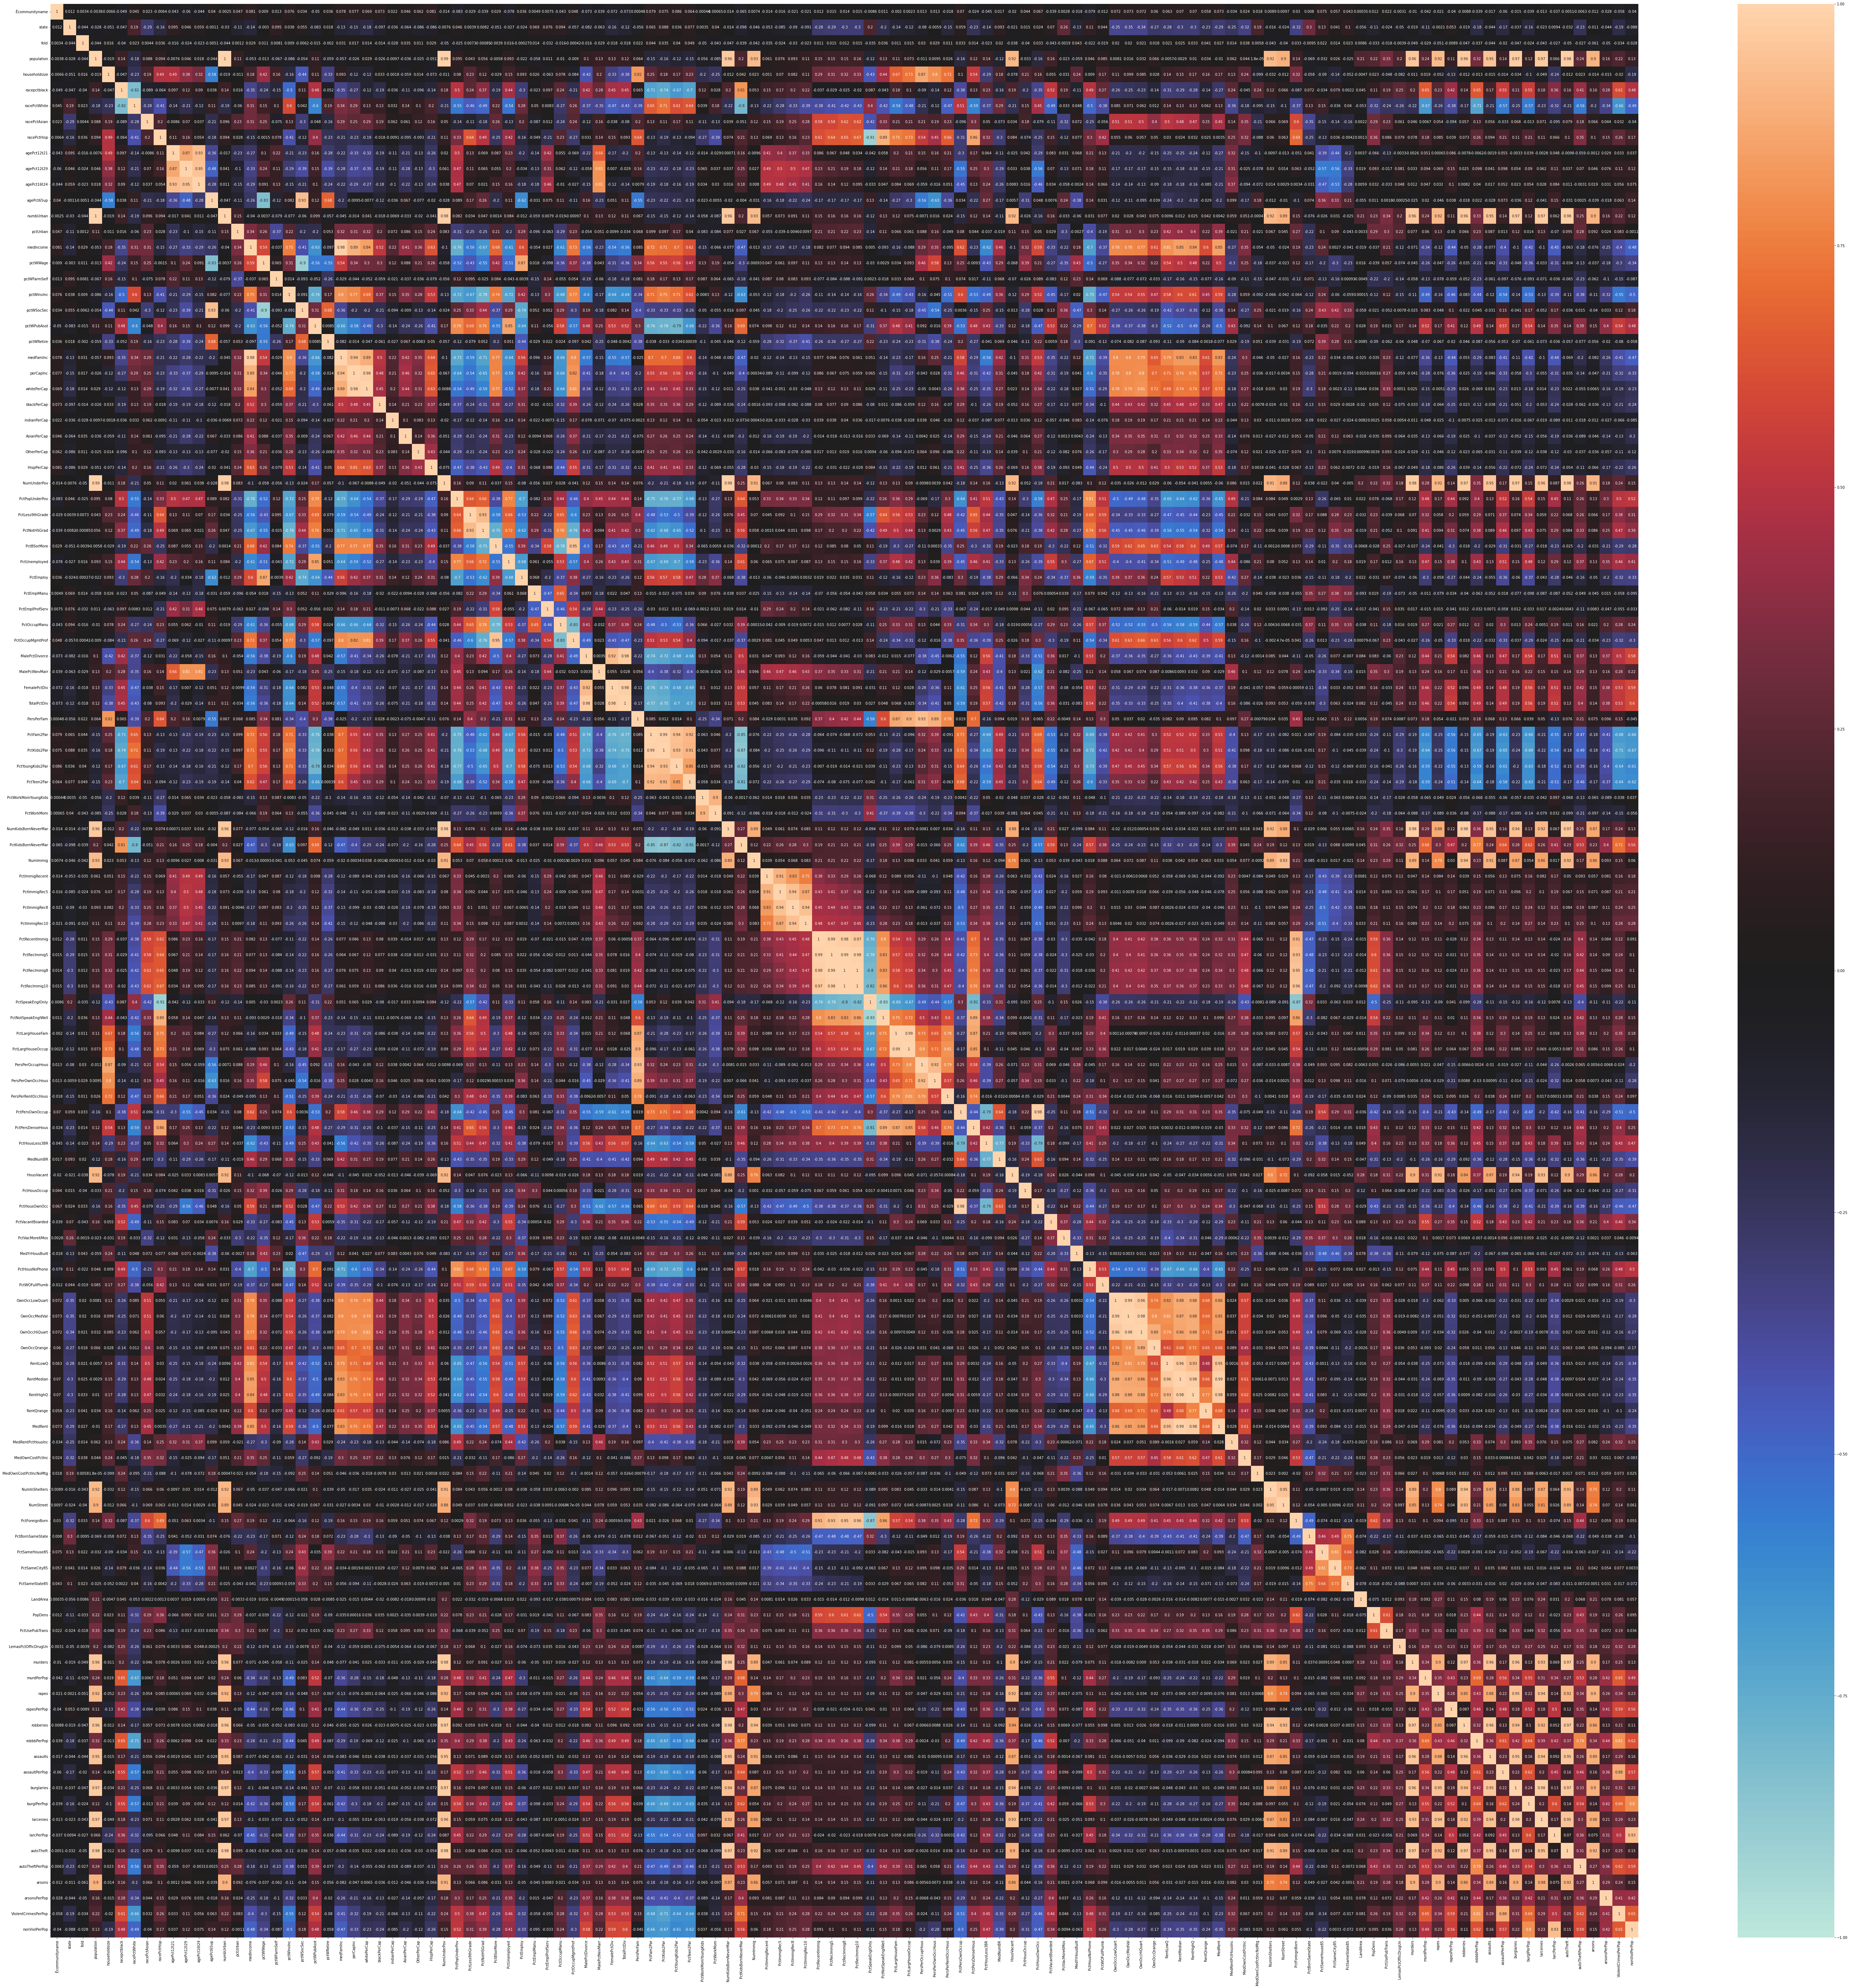

In [15]:
# Creando matriz de correlacion con variables numericas
import seaborn as sns
f, ax = plt.subplots(figsize = (100, 100))
sns.heatmap(data.corr(method = 'pearson'), annot = True, vmin = -1, vmax = 1, center = 0)
plt.show()

Se observa que hay muchas variables que cuentan con correlación tanto positiva como negativa.

In [16]:
def get_redundant_pairs(data):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(data, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top correlaciones (en valor absoluto)")
print(get_top_abs_correlations(df, 100))

Top correlaciones (en valor absoluto)
population           numbUrban              0.999052
PctRecImmig8         PctRecImmig10          0.995133
PctRecImmig5         PctRecImmig8           0.993770
OwnOccLowQuart       OwnOccMedVal           0.991415
PctRecentImmig       PctRecImmig5           0.989896
RentMedian           MedRent                0.987347
population           NumUnderPov            0.986054
PctFam2Par           PctKids2Par            0.985596
PctLargHouseFam      PctLargHouseOccup      0.985382
PctRecImmig5         PctRecImmig10          0.984929
OwnOccMedVal         OwnOccHiQuart          0.984659
burglaries           larcenies              0.984233
numbUrban            NumUnderPov            0.984119
NumUnderPov          autoTheft              0.983919
FemalePctDiv         TotalPctDiv            0.983879
NumUnderPov          NumKidsBornNeverMar    0.982306
PctPersOwnOccup      PctHousOwnOcc          0.982166
NumKidsBornNeverMar  robberies              0.981252
populati

# 3) Regresión lineal (tomando todas las características del modelo).

In [17]:
# Cambiando el orden de la variable respuesta para que este al final del dataset y sea mas facil manipular
pd.options.display.max_seq_items = None
data.columns

Index(['Êcommunityname', 'state', 'fold', 'population', 'householdsize',
       'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
       'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban',
       'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
       'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
       'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'P

In [18]:
# Cambiando orden de la variable respuesta
data = data[['Êcommunityname', 'state', 'fold', 'population', 'householdsize',
       'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
       'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban',
       'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
       'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
       'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
       'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam',
       'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous',
       'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
       'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup',
       'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',
       'OwnOccHiQuart', 'OwnOccQrange', 'RentLowQ', 'RentMedian', 'RentHighQ',
       'RentQrange', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
       'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
       'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85',
       'LandArea', 'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn',
       'murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies',
       'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop',
       'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons',
       'arsonsPerPop', 'nonViolPerPop', 'ViolentCrimesPerPop']]

In [19]:
# Visualizando resultado con el cambio propuesto
data.head()

Êcommunityname  state  fold  population  householdsize  racepctblack  \
0           149.0   28.0   1.0     11980.0           3.10          1.37   
1          1034.0   35.0   1.0     23123.0           2.82          0.80   
2          1780.0   34.0   1.0     29344.0           2.43          0.74   
3           664.0   31.0   1.0     16656.0           2.40          1.70   
4           140.0   22.0   1.0     11245.0           2.76          0.53   

   racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  \
0         91.78          6.50         1.88        12.47        21.44   
1         95.57          3.44         0.85        11.01        21.30   
2         94.33          3.43         2.35        11.36        25.88   
3         97.35          0.50         0.70        12.55        25.20   
4         89.16          1.17         0.52        24.46        40.53   

   agePct16t24  agePct65up  numbUrban  pctUrban  medIncome  pctWWage  \
0        10.93       11.33    11980.0     100.0    75122.0     89.24   
1        10.48       17.18    23123.0     100.0    47917.0     78.99   
2        11.01       10.28    29344.0     100.0    35669.0     82.00   
3        12.19       17.57        0.0       0.0    20580.0     68.15   
4        28.69       12.65        0.0       0.0    17390.0     69.33   

   pctWFarmSelf  pctWInvInc  pctWSocSec  pctWPubAsst  pctWRetire  medFamInc  \
0          1.55       70.20       23.62         1.03       18.39    79584.0   
1          1.11       64.11       35.50         2.75       22.85    55323.0   
2          1.15       55.73       22.25         2.94       14.56    42112.0   
3          0.24       38.95       39.48        11.71       18.33    26501.0   
4          0.55       42.82       32.16        11.21       14.43    24018.0   

   perCapInc  whitePerCap  blackPerCap  indianPerCap  AsianPerCap  \
0    29711.0      30233.0      13600.0        5725.0      27101.0   
1    20148.0      20191.0      18137.0           0.0      20074.0   
2    16946.0      17103.0      16644.0       21606.0      15528.0   
3    10810.0      10909.0       9984.0        4941.0       3541.0   
4     8483.0       9009.0        887.0        4425.0       3352.0   

   OtherPerCap  HispPerCap  NumUnderPov  PctPopUnderPov  PctLess9thGrade  \
0       5115.0     22838.0        227.0            1.96             5.81   
1       5250.0     12222.0        885.0            3.98             5.61   
2       5954.0      8405.0       1389.0            4.75             2.80   
3       2451.0      4391.0       2831.0           17.23            11.05   
4       3000.0      1328.0       2855.0           29.99            12.15   

   PctNotHSGrad  PctBSorMore  PctUnemployed  PctEmploy  PctEmplManu  \
0          9.90        48.18           2.70      64.55        14.65   
1         13.72        29.89           2.43      61.96        12.26   
2          9.09        30.13           4.01      69.80        15.95   
3         33.68        10.81           9.86      54.74        31.22   
4         23.06        25.28           9.08      52.44         6.89   

   PctEmplProfServ  PctOccupManu  PctOccupMgmtProf  MalePctDivorce  \
0            28.82          5.49             50.73            3.67   
1            29.28          6.39             37.64            4.23   
2            21.52          8.79             32.48           10.10   
3            27.43         26.76             22.71           10.98   
4            36.54         10.94             27.80            7.51   

   MalePctNevMarr  FemalePctDiv  TotalPctDiv  PersPerFam  PctFam2Par  \
0           26.38          5.22         4.47        3.22       91.43   
1           27.99          6.45         5.42        3.11       86.91   
2           25.78         14.76        12.55        2.95       78.54   
3           28.15         14.47        12.91        2.98       64.02   
4           50.66         11.64         9.73        2.98       58.59   

   PctKids2Par  PctYoungKids2Par  PctTeen2Par  PctWorkMomY

Se puede observar ahora como la variable respuesta se encuentra al final del dataset, ahora podemos empezar con nuestro modelo lineal.

In [20]:
# Importando bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [21]:
pd.reset_option("display.max_rows")
# División de los datos en train y test
X = data.iloc[:, 0:122].values
y = data.iloc[:, 122:123].values

# Creando train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)

In [22]:
# Creando modelo
modelo_1 = LinearRegression()
modelo_1.fit(X = X_train, y = y_train)

LinearRegression()

In [23]:
# Información del modelo
print("El intercepto es:", modelo_1.intercept_)
print("Coeficiente de determinación R^2:", modelo_1.score(X, y))

El intercepto es: [1512.00443212]
Coeficiente de determinación R^2: 0.9221260578804179


In [24]:
# Evaluando capacidad predictiva del modelo
# Error de test del modelo 

predicciones = modelo_1.predict(X = X_test)
mse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False)
import math 
rmse = math.sqrt(mse)
print('Error cuadratico Medio:', round(mse,2))
print('Raiz del Error cuadratico medio:', round(rmse,2))

Error cuadratico Medio: 169.94
Raiz del Error cuadratico medio: 13.04


In [25]:
# Comparacion de modelo con Stats
# Creando una constante
X_train_lm = sm.add_constant(X_train)
# Creando el primer modelo fitteado
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:42:44   Log-Likelihood:                -11563.
No. Observations:                1772   AIC:                         2.337e+04
Df Residuals:                    1651   BIC:                         2.403e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1512.0044   1799.778      0.840      0.4

In [26]:
#Añadimos una constante al X_test
X_test_lr_1 = sm.add_constant(X_test)
#Realizamos un predict del nuevo X_test
ypred_lr_1 = lr_1.predict(X_test_lr_1)
#Calculamos el error cuadrático medio
mse_lr_1 = mean_squared_error(
             y_true  = y_test,
             y_pred  = ypred_lr_1,
             squared = False)

rmse_lr_1 = math.sqrt(mse_lr_1)
print('Error cuadratico Medio:', round(mse_lr_1,2))
print('Raiz del Error cuadratico medio:', round(rmse_lr_1,2))

Error cuadratico Medio: 169.94
Raiz del Error cuadratico medio: 13.04


Se puede observar como este modelo lineal con todas las variables cuenta con un coeficiente de determinación de 92.2% y un intercepto de 1512. 
La raíz del error cuadrático medio nos arroja un 13.04 (en este caso entre más cercano a 0 mejor). Con el presente modelo podemos visualizar que es bastante robusto, ya que nos da un R2 bastante cercano a 100 o 1, lo que indica que el modelo puede explicar en mucha medida la variable que tratamos de predecir, sin embargo cuenta con muchísimas variables lo que lo puede hacer insostenible en el tiempo. 

Hay algunas variables como la raza, nivel de educación, la clase socioeconómica que tienen más preponderancia a nivel de la matriz de correlación.

## **Comparación de modelos**

En este apartado se opta por utilizar tanto la biblioteca de Scikit Learn como la Stats Models, para ver si hay algún grado de mejoría en ambas predicciones, por ello contamos con lo siguiente:

1. Podemos observar que el primer modelo tiene como intercepto $1512$, junto con un coeficiente de determinación $R^2$ de $0.922$.

2. Por otra parte, en el segundo modelo, tenemos un intercepto de $1512$, junto con un coeficiente de determinación $R^2$ de $0.925$.

3. Claramente, ambos modelos son bastante similares, con la pequeña mejoría del $R^2$ utilizando Statsmodel. Además, presentan el mismo error cuadrado medio $MSE$.


# 4) Regresión lineal (tomando 68 características basadas en la matriz de correlación).

In [27]:
# Creando nuevo dataset basado en la matriz de confusion
data_1 = data[['AsianPerCap','OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
       'PctSpeakEnglOnly', 'PctNotSpeakEnglWell',
       'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous',
       'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
       'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup',
       'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',
       'OwnOccHiQuart', 'OwnOccQrange', 'RentMedian', 'RentHighQ',
       'RentQrange', 'LemasPctOfficDrugUn','murders', 'rapes','robberies','assaults', 'burglaries', 
       'larcenies', 'larcPerPop', 'autoTheft', 'arsons','ViolentCrimesPerPop']]

Para seleccionar estas variables se eligieron todas aquellas que tuviesen menos de 0.5 de correlación con la variable `Y= ViolentCrimesPerPop` y que fueran mayores a -0.5 con la misma variable explicada anteriormente. Es decir 
\begin{equation}
|corr[X_i, Y]| \leq 0.5.
\end{equation} 

In [28]:
# Comprobando tamano del nuevo dataset
data_1.shape

(2215, 69)

In [29]:
# División de los datos en train y test
X = data_1.iloc[:, 0:68].values
y = data_1.iloc[:, 68:69].values

# Creando train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)

In [30]:
# Creando modelo
modelo_2 = LinearRegression()
modelo_2.fit(X = X_train, y = y_train)

LinearRegression()

In [31]:
# Información del modelo
print("Intercept:", modelo_2.intercept_)
print("Coeficiente de determinación R^2:", modelo_2.score(X, y))

Intercept: [7005.3472168]
Coeficiente de determinación R^2: 0.5018163903523332


In [32]:
# Evaluando capacidad predictiva del modelo
# Error de test del modelo 

predicciones = modelo_2.predict(X = X_test)
mse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False)

rmse = math.sqrt(mse)

print('Error cuadratico Medio:', round(mse,2))
print('Raiz del Error cuadratico medio:', round(rmse,2))

Error cuadratico Medio: 697.62
Raiz del Error cuadratico medio: 26.41


In [33]:
# Comparacion de modelo con Stats
# Creando una constante
X_train_lm_2 = sm.add_constant(X_train)

# Creando el primer modelo fitteado
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()
# Mostrando resultados del modelo
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     68.17
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:42:44   Log-Likelihood:                -12705.
No. Observations:                1772   AIC:                         2.555e+04
Df Residuals:                    1704   BIC:                         2.592e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7005.3472   2341.962      2.991      0.0

In [34]:
#Creando un nuevo X_test
X_test_lr_2 = sm.add_constant(X_test)
#Realizamos un predict con el nuevo X_test
ypred_lr_2 = lr_2.predict(X_test_lr_2)
#Calculamos el MSE
mse_lr_2 = mean_squared_error(
                      y_true  = y_test,
                      y_pred  = ypred_lr_2,
                      squared = False)
rmse_lr_2 = math.sqrt(mse_lr_2)
print('Error cuadratico Medio:', round(mse_lr_2,2))
print('Raiz del Error cuadratico medio:', round(rmse_lr_2,2))

Error cuadratico Medio: 697.62
Raiz del Error cuadratico medio: 26.41


## **Comparación de modelos**
En este apartado también estamos haciendo la comparación utilizando la biblioteca de Scikit Learn y la de StatsModels, por ello contamos con lo siguiente: 

1. Podemos observar que el primer modelo presenta un intercepto de $7005.34$, junto con un coeficiente de determinación $R^2$ de $0.501$.

2. Por otra parte, el modelo con Statsmodel presenta un intercepto de $7005.34$, con un coeficiente de determinación $R^2$ de $0.728$.

3. Claramente, como en el caso anterior, ambos modelos presentan el mismo intercepto. Pero, ahora se presenta diferencia más amplia entre los coeficientes de determinación, coronando al segundo modelo como el mejor de ambos.

# 5) Regresión lineal (tomando 23 características basadas en el valor p).

In [35]:
# Retornando a dataset original
X = data.iloc[:, 0:122].values
y = data.iloc[:, 122:123].values

# Creando train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)

In [36]:
# Creando test OLS para ver resultados de P values
model = sm.OLS(y, X)
results = model.fit() 
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              426.7
Date:                Mon, 19 Sep 2022   Prob (F-statistic):                        0.00
Time:                        18:42:45   Log-Likelihood:                         -14442.
No. Observations:                2215   AIC:                                  2.912e+04
Df Residuals:                    2095   BIC:                                  2.981e+04
Df Model:                         120                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Se van a tomar las siguientes variables:

$x2, x5, x6,x13, x19, x20, x21, x24, x25, x28, x31, x32,x33, x34, x36,x46, x48,x50,x54, x66, x67,x73 $ y 'ViolentCrimesPerPop'

Se toman estas ya que se rechaza la hipotesis nula y se acepta la hipotesis alternativa, es decir, todas las elegidas tienen un p-value menor a $0.05$ por lo que se son variables significativas para el modelo. 

In [37]:
# Creando nuevo dataset
data_2 = data[['state','householdsize','agePct65up',
               'pctWInvInc','pctWSocSec','pctWPubAsst',
               'perCapInc','whitePerCap', 'AsianPerCap',
               'NumUnderPov','PctPopUnderPov','PctLess9thGrade',
               'PctNotHSGrad','PctUnemployed', 'PersPerFam',
               'PctKids2Par','PctTeen2Par','PctWorkMom',
               'PctImmigRecent', 'PersPerOccupHous','PersPerOwnOccHous',
               'HousVacant','PctHousOccup','ViolentCrimesPerPop']]
data_2.head()

state  householdsize  agePct65up  pctWInvInc  pctWSocSec  pctWPubAsst  \
0   28.0           3.10       11.33       70.20       23.62         1.03   
1   35.0           2.82       17.18       64.11       35.50         2.75   
2   34.0           2.43       10.28       55.73       22.25         2.94   
3   31.0           2.40       17.57       38.95       39.48        11.71   
4   22.0           2.76       12.65       42.82       32.16        11.21   

   perCapInc  whitePerCap  AsianPerCap  NumUnderPov  PctPopUnderPov  \
0    29711.0      30233.0      27101.0        227.0            1.96   
1    20148.0      20191.0      20074.0        885.0            3.98   
2    16946.0      17103.0      15528.0       1389.0            4.75   
3    10810.0      10909.0       3541.0       2831.0           17.23   
4     8483.0       9009.0       3352.0       2855.0           29.99   

   PctLess9thGrade  PctNotHSGrad  PctUnemployed  PersPerFam  PctKids2Par  \
0             5.81          9.90           2.70        3.22        90.17   
1             5.61         13.72           2.43        3.11        85.33   
2             2.80          9.09           4.01        2.95        78.85   
3            11.05         33.68           9.86        2.98        62.36   
4            12.15         23.06           9.08        2.98        55.20   

   PctTeen2Par  PctWorkMom  PctImmigRecent  PersPerOccupHous  \
0        95.81       58.88            8.69              2.99   
1        86.46       62.43            5.21              2.70   
2        75.72       74.19           16.42              2.42   
3        67.43       70.27           13.86              2.37   
4        79.17       68.94           46.94              2.35   

   PersPerOwnOccHous  HousVacant  PctHousOccup  ViolentCrimesPerPop  
0               3.00        64.0         98.37                41.02  
1               2.83       240.0         97.15               127.56  
2               2.69       544.0         95.68               218.59  
3               2.51       669.0         91.19               306.64  
4               2.55       333.0         92.45              1166.05

In [38]:
# División de los datos en train y test
X = data_2.iloc[:, 0:23].values
y = data_2.iloc[:, 23:24].values

# Creando train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)

In [39]:
# Creando modelo
modelo_3 = LinearRegression()
modelo_3.fit(X = X_train, y = y_train)

LinearRegression()

In [40]:
# Información del modelo
print("Intercept:", modelo_3.intercept_)
print("Coeficiente de determinación R^2:", modelo_3.score(X, y))

Intercept: [3201.54381552]
Coeficiente de determinación R^2: 0.5910376983266823


In [41]:
# Evaluando capacidad predictiva del modelo
# Error de test del modelo 

predicciones = modelo_3.predict(X = X_test)

mse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False)

print('Error cuadratico Medio:', round(mse,2))
print('Raiz del Error cuadratico medio:', round(rmse,2))

Error cuadratico Medio: 377.04
Raiz del Error cuadratico medio: 26.41


In [42]:
# Comparacion de modelo con Stats
# Creando una constante
X_train_lm_3 = sm.add_constant(X_train)

# Creando el primer modelo fitteado
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()
# Viendo resultados de modelo con Stats
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     114.1
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:42:45   Log-Likelihood:                -13047.
No. Observations:                1772   AIC:                         2.614e+04
Df Residuals:                    1748   BIC:                         2.627e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3201.5438    466.420      6.864      0.0

In [43]:
#Creando un nuevo X_test
X_test_lr_3 = sm.add_constant(X_test)
#Realizamos un predict con el nuevo X_test
ypred_lr_3 = lr_3.predict(X_test_lr_3)
#Calculamos el MSE
mse_lr_3 = mean_squared_error(
                      y_true  = y_test,
                      y_pred  = ypred_lr_3,
                      squared = False)
rmse_lr_3 = math.sqrt(mse_lr_3)
print('Error cuadratico Medio:', round(mse_lr_3,2))
print('Raiz del Error cuadratico medio:', round(rmse_lr_3,2))

Error cuadratico Medio: 377.04
Raiz del Error cuadratico medio: 19.42


## **Comparación de modelos**
Aquí también se opta por comparar los modelos utilizando las dos bibliotecas que se ha venido mencionando, teniendo los siguientes resultados: 

1. Podemos ver que el primer modelo con $23$ variables predictoras, presenta un intercepto de $3201.54$ y un coeficiente de determinación $R^2$ de $0.59$.

2. Por otro lado, el modelo con Stats presenta un intercepto de  $3201.54$ junto con un coeficiente de determinación $R^2$ de $0.6$.

3. Claramente, son modelos bastante parecidos. Ambos presentan un $MSE$ semejante. Además, en relación al modelo Stats, notemos que, no todas las variables son significativas a pesar de haber seleccionado solamente variables significativas en el modelo anterior.

# Comparación de modelos lineales por AIC y BIC

Resumiendo los criterios de información AIC y BIC de los modelos de regresión lineal con Stats, tenemos:
+ Para el modelo con todas las variables:
  + *AIC*: $2.337e+04$.
  + *BIC*: $2.403e+04$.
+ Para el modelo con 68 variables:
  + *AIC*: $2.555e+04$.
  + *BIC*: $2.592e+04$.
+ Para el modelo con 23 variables:
  + *AIC*: $2.614e+04$.
  + *BIC*: $2.627e+04$.

Podemos analizar comparativamente que el modelo con más variables es que presenta menor $AIC$ y $BIC$. Pero, si nos orientamos por la convención de que hay que considerar válidos los modelos con un delta $\Delta \leq 2$, vemos que todos los modelos son válidos. Por tanto, no hay mucha diferencia, en materia de criterios de información, por parte de los modelos.

# 6) Regresión polinomial (tomando 23 características basadas en el valor p).

Para este caso se toman las mismas 23 caracteristicas que se utilizaron en el punto anterior (punto 5).

In [44]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# División de los datos en train y test
X = data_2.iloc[:, 0:23].values
y = data_2.iloc[:, 23:24].values

# Creando train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)

#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

#Entreno el modelo
pr.fit(X_train_poli, y_train)

#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)


mse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = Y_pred_pr))
rmse = np.sqrt(mse)

print('Valor del intercepto es:')
print(pr.intercept_)
print('Error Cuadrático Medio (MSE) = ' + str(round(mse,2)))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(round(rmse,2)))
print('El coeficiente de determinación:')
print(pr.score(X_train_poli, y_train))

Valor del intercepto es:
[131.26828878]
Error Cuadrático Medio (MSE) = 528.96
Raíz del Error Cuadrático Medio (RMSE) = 23.0
El coeficiente de determinación:
0.7396209428965473


## **Resultado**

Podemos obervar que con la mismas variables seleccionadas para el modelo lineal, el modelo de regresión polinómica de grado 2, posee distintos valores. A saber, presenta un intercepto de $131.2$, junto con un coeficiente de determinación $R^2$ de $0.739$. Pero, con la salvedad de que el $RMSE$ es mayor. Asimismo ya se puede ir observando que en la medida en que se van bajando la cantidad de variables que se utilizan en los modelos, estos tienden a dar un coeficiente de determinación menor, lo cual es natural ya que no contamos con todas las variables que añaden la cantidad total de información aunque no sea tan significativa. 


# 7) Regresión de Ridge (tomando 23 características basadas en el valor p). Usar Ridge regression con 5-fold cross-validation y gridsearch


In [45]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
from sklearn.model_selection import GridSearchCV
params_Ridge = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(X_train,y_train)
Ridge_GS.best_params_

{'alpha': 1, 'fit_intercept': True, 'solver': 'cholesky'}

In [46]:
Ridgeregression = Ridge(random_state=3, **Ridge_GS.best_params_)
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=Ridgeregression, X=X_train, y=y_train, cv=5)
all_accuracies

array([0.53515786, 0.58369442, 0.64631252, 0.53230199, 0.59403178])

In [47]:
print("Coeficiente de determinación R^2:", Ridge_GS.score(X_train, y_train))

Coeficiente de determinación R^2: 0.600073039345612


Podemos observar que este modelo no da resultados buenos, ya que primero se opta por optimizarlo utilizando GridSearch y se utiza un K-Fold de 5 particiones y obtenemos un coeficiente de determinación de 60% lo cual es bastante más bajo que los otros modelos que se han presentado y en los que se han utilizado las mismas variables para modelar.

# 8) Regresión lineal ponderada (tomando 23 características basadas en el valor p).



Los mínimos cuadrados ponderados ( WLS ), también conocidos como regresión lineal ponderada, son ​​una generalización de los mínimos cuadrados ordinarios y la regresión lineal en la que el conocimiento de la varianza de las observaciones se incorpora a la regresión.

La librería statsmodel no tiene un paquete propio de la regresión lineal ponderada (Weighted Linear Regression). Lo que se debe hacer es una regresión lineal simple (OLS) pero "modificada" en sus coeficientes.

Primeramente presentamos el modelo de regresión lineal simple con el método de "mínimos cuadrados ordinarios" (orinary least squared OLS) para después compararlo con el mismo método pero añadiendo "pesos".



### Regresión lineal simple OLS

In [48]:
## Load Packages
%matplotlib inline
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

# División de los datos en train y test
X = data_2.iloc[:, 0:23].values
y = data_2.iloc[:, 23:24].values

# Creando train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)

## fit the OLS model and check the result
X_train2 = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train2).fit()
print(model_ols.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     114.1
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:43:28   Log-Likelihood:                -13047.
No. Observations:                1772   AIC:                         2.614e+04
Df Residuals:                    1748   BIC:                         2.627e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3201.5438    466.420      6.864      0.0

Vemos que el modelo OLS tiene como coeficiente de determinación $R^2$ $0.6$, con un intercepto de $3201.54$. 

Ahora, crearemos un modelo con pesos para visualizar como cambian los indicadores


In [49]:
#Guardamos los valores esperados.
model_fitted_y = model_ols.fittedvalues
#Guardamos los residuos del modelo.
model_residuals = model_ols.resid
#Guardamos los residuos pero en valor absoluto.
model_abs_resid = np.abs(model_residuals)


### Regresión lineral ponderada WLS1 

El peso aquí es el inverso de los valores ajustados obtenidos del modelo OLS.

In [50]:
model_wls1 = sm.OLS(model_fitted_y**-1 , X_train2).fit()
print(model_wls1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.261
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           3.02e-07
Time:                        18:43:28   Log-Likelihood:                 443.38
No. Observations:                1772   AIC:                            -838.8
Df Residuals:                    1748   BIC:                            -707.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3980      0.230      1.727      0.0

Vemos que ahora la gran mayoría de las variables son altamente no significativas en la regresión, y el coeficiente de determinación ha bajado considerablemente a la cifra de $0.041$.

### Regresión lineral ponderada WLS2 

Aquí hacemos una regresión de los valores absolutos de los residuos contra el predictor. Los valores ajustados resultantes de esta regresión son estimaciones del error y lo usaremos como peso. Por tanto, estos pesos no son aptos para modelar.


In [51]:
model_alter = sm.OLS(model_abs_resid , X_train2).fit()
weight = model_alter.fittedvalues
model_wls2 = sm.OLS(weight**-2 , X_train2).fit()
print(model_wls2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.846
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           7.94e-06
Time:                        18:43:28   Log-Likelihood:                 8285.9
No. Observations:                1772   AIC:                        -1.652e+04
Df Residuals:                    1748   BIC:                        -1.639e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.003      0.142      0.8

Al igual que el primer WLS que ahora la gran mayoría de las variables son altamente no significativas en la regresión, y el coeficiente de determinación ha bajado considerablemente a la cifra de $0.06$. Por tanto, estos pesos no son aptos para modelar.


### Regresión lineral ponderada WLS3 

Aquí hacemos una regresión de los residuos al cuadrado contra el predictor. Los valores ajustados resultantes se utilizan como peso.

In [52]:
model_alter2 = sm.OLS(model_residuals**2 , X_train2).fit()
weight2 = abs(model_alter2.fittedvalues)
model_wls3 = sm.OLS(weight2**-1 , X_train2).fit()
print(model_wls3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.279
Date:                Mon, 19 Sep 2022   Prob (F-statistic):              0.169
Time:                        18:43:28   Log-Likelihood:                 11619.
No. Observations:                1772   AIC:                        -2.319e+04
Df Residuals:                    1748   BIC:                        -2.306e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.440      0.6

Al igual que los otros dos modelos WLS, los pesos añadidos en vez de mejorar le modelo lineal simple OLS lo empeoran drásticamente, dejando a la gran mayoría de variables no significativas, y con un coeficiente de determinación cercano a  $0$.

# 9) Estudiar el modelo XG boost Regresión de XG boost (Tomando 23 características basadas en el valor p).

Primeramente realizaremos un XGboost de regresión lineal con un n_stimators de $10000$ y un cross validation de 10 iteraciones para estimar correctamente el valor de $R^2$.

In [53]:
import xgboost as xbg
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# División de los datos en train y test
X = data_2.iloc[:, 0:23].values
y = data_2.iloc[:, 23:24].values

# Creando train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)

# Creando el modelo lineal
xgb_r = xbg.XGBRegressor(objective ='reg:linear',
                        n_estimators = 10000, seed = 123)
  
# Fitting 
xgb_r.fit(X_train, y_train)
  
# Predicciones del modelo
pred = xgb_r.predict(X_test)
  
# RMSE 
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE : % f" %(rmse))
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(xgb_r, X_train, y_train , scoring='r2', cv=kfold) 
print(scores)

[18:43:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  366.312332
[18:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:45:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprec

Podemos ver que el modelo XGBoosting de regresión lineal presenta un buen coeficiente de determinación, alcanzando un valor de $0.69$

Ahora, en segunda instancia, modelamos con áboles de decisión para poder comprarlo con el modelo lineal.
El siguiente modelo tiene los parámetros
+ Learning rate = $0.001$.
+ Max_depth = $29$.
+ Gamma = $0.001$.

In [54]:
# Creando el modelo de árbol
xgb_r_2 = xbg.XGBRegressor(booster ='gbtree',
                         ate= 0.001,
                         max_depth = 29,
                         gamma = 0.001,
                         seed = 123)
  
# Fitting 
xgb_r_2.fit(X_train, y_train)
  
# Predicciones del modelo
pred2 = xgb_r_2.predict(X_test)
  
# RMSE 
rmse = np.sqrt(mean_squared_error(y_test, pred2))
kfold2 = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(xgb_r_2, X_train, y_train , scoring='r2', cv=kfold2) 
print("RMSE : % f" %(rmse))
print(scores)

[18:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Podemos ver que nuestro segundo modelo con árboles de decisión alcanza un coeficiente de determinación de $0.65$ un poco menor que el modelo lineal. Sin embargo, vemos que XBboosting son óptimos para explicar la variable 'ViolentCrimesPerPop'.

# 10) Regresión de Gradient Boosting (tomando 23 características basadas en el valor p).


MSE: 132168.64


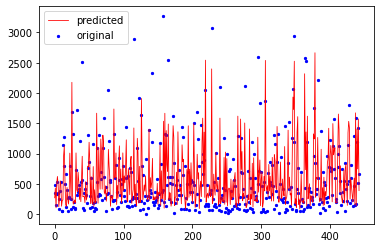

El coeficiente de determinación es 0.8251322628439288


In [61]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = data_2.iloc[:, 0:23].values
y = data_2.iloc[:, 23:24].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)

# Por defecto
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

ypred = gbr.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("MSE: %.2f" % mse)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

print("El coeficiente de determinación es", gbr.score(X_train,y_train))

Con lo referente a este modelo podemos observar que ha dado un coeficiente de determinación muy por encima de los otros modelos lineales que se han utilizado, ya que su R2 asciende a 82.51% y en este caso hemos utilizado solamente las 23 variables que se han utilizado en los otros. 

Además en la gráfica podemos observar que los puntos predichos versus los originales la mayoría de las veces si hay un ajuste bastante bueno, aunque es evidente que no es perfecto pero que en definitiva sí se puede utilizar para explicar la variable a predecir.

#11) Regresión Light GBM (tomando 23 características basadas en el valor p).


In [56]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
import os

In [57]:
#Preparamos la data
X = data_2.iloc[:, 0:23].values
y = data_2.iloc[:, 23:24].values

#Creamos datatrain y datatest
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)
y_train=y_train.ravel()
y_test=y_test.ravel()

#Preparamos los datos para LGM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

#Definimos los parámetros del modelo
parametros =  {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.001,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 21,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}

gbm = lgb.train(parametros,
                lgb_train,
                num_boost_round=200,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=500)])



y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

mse_test = mean_squared_error(y_test, y_pred)**0.5
Rmse_test = mse_test**0.5
print(f'El MSE es : {mse_test}')
print(f'El RMSE es : {Rmse_test}')
print("El R^2 es :", r2_score(y_train, gbm.predict(X_train)))

[1]	valid_0's l2: 314809	valid_0's l1: 412.569
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's l2: 314447	valid_0's l1: 412.28
[3]	valid_0's l2: 314075	valid_0's l1: 412.012
[4]	valid_0's l2: 313665	valid_0's l1: 411.694
[5]	valid_0's l2: 313259	valid_0's l1: 411.384
[6]	valid_0's l2: 312899	valid_0's l1: 411.091
[7]	valid_0's l2: 312522	valid_0's l1: 410.817
[8]	valid_0's l2: 312151	valid_0's l1: 410.514
[9]	valid_0's l2: 311748	valid_0's l1: 410.202
[10]	valid_0's l2: 311388	valid_0's l1: 409.918
[11]	valid_0's l2: 311006	valid_0's l1: 409.625
[12]	valid_0's l2: 310621	valid_0's l1: 409.33
[13]	valid_0's l2: 310242	valid_0's l1: 409.039
[14]	valid_0's l2: 309865	valid_0's l1: 408.748
[15]	valid_0's l2: 309480	valid_0's l1: 408.449
[16]	valid_0's l2: 309101	valid_0's l1: 408.156
[17]	valid_0's l2: 308723	valid_0's l1: 407.863
[18]	valid_0's l2: 308345	valid_0's l1: 407.575
[19]	valid_0's l2: 307967	valid_0's l1: 407.286
[20]	valid_0's l2: 307588	valid_0's 

Podemos visualizar que el modelo posee unas métricas bastante prometedoras para los parámetros definidos al inicio. Cuenta con un $MSE = 351$, $RMSE =18.7$ y un coeficiente de determinación $R^2 = 0.84$. 

Se puede observar como este modelo de todos los antes tratados (excepto intregando todas las variables) es el que da los mejores resultados y solo dista en un 8% del modelo que tenía todas las variables originales, lo cual hemos podido encontrar un ajuste con solo 23 variables que es capaz de explicar en gran medida la variable respuesta sin recorrer a utilizar todas las variables originales. 

# 12) Conclusión:

Se puede observar lo siguiente:

1. Se cuenta con varias variables que añaden más y menos información como las variables de: educación, raza, género, y el área donde se recolectaron los datos.
2. La mayoría de variables cuentan con correlación tanto positiva como negativa, son pocas las que no tienen ningún grado de correlación y que además sean significativas.
3. En la que medida en que hay más variables el modelo se puede explicar mejor pero también es un modelo más lento y que para ponerlo en producción se necesitará más capacidad computacional y controlar más variables. 
4. Se puede observar como la Regresión Light GBM es la que arroja los mejores resultados con solo 23 características la que la hace bastante robusta para poder utilizarla en un ambiente de producción. 
5. En la medida en que disminuimos la cantidad de variables el modelo será más rápido pero perderá explicabilidad. 
6. Un R2 alto no indica que nuestro modelo siempre será bueno, ya que un R2 solo es una fotografía en un momento dado si los datos cambian de un día para otro o si no se prueban con datos reales, perfectamente el R2 cuando lo pongamos en producción más bien sea más bajo y nuestro modelo no funcione. 
7. Los modelos no son eternos, y se tienen que evaluar y revisar constantemente ya que los datos no siempre van a ser iguales, los gustos, las necesidades y las características de la población están en constante evolución y siempre tienen que ser revisados para asegurarnos de que los modelos son capaces de explicar dichos cambios y a lo largo del tiempo y sino, es necesario explorar otros modelos que sí los puedan explicar.